# Inorganic aka Materials Informatics

## Simple features 

## Machine learning в дикой природе

Как правило, процесс машинного обучения выглядит так:
1. Берём результат чужой или свой работы -- эксперименталные измерения, теоретические расчёты и т.д. -- Собираем данные.
2. Анализируем и очищаем данные, выделяем признаки.
3. Обучем алгоритмы ML, подстраиваем их параметры.
4. Анализируем результаты предсказания и качество работы модели (и пишем статью).
5. ????
6. Вы великолепны! 

<img src="data/ml_workflow.png" alt="machine learning workflow" style="width: 700px;"/>

Для упрощения и автоматизации шагов 1-2 люди настраивают целую инфраструктуру и создают специализированные библиотеки. С одного из таких инструментов, `matminer`, мы и начнём работу!

<img src="data/matminer.png" alt="matminer overview" style="width: 700px;"/>

## Часть 1: Извлекаем и фильтруем данные  

Matminer выступает интерфейсом к куче разных репозиториев и баз данных:
- Materials Project
- Citrine
- AFLOW
- Materials Data Facility (MDF)
- Materials Platform for Data Science (MPDS)
- Статьи (по цеолитам?) если авторы не против)

Давайте взглянем на некоторые из них

In [32]:
!pip install matminer

In [43]:
from matminer.datasets import get_available_datasets
import pandas as pd

get_available_datasets()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'superconductivity2018',
 'tholander_nitrides',
 'ucsb_thermoe

Все выборки можно загрузить с помощью функции `load_dataset()` с имененм выборки. Чтобы сэкономить место для установки, наборы данных не загружаются автоматически при установке matminer. Вместо этого, при первой загрузке набора данных, он будет загружен из Интернета и сохранен в каталоге установки matminer.


Допустим, нас интересует набор данных `dielectric_constant`, который содержит 1056 структур с диэлектрическими свойствами, рассчитанными с помощью DFPT-PBE. Грузим его с помощью функции `load_dataset`.

In [34]:
from matminer.datasets import load_dataset
df=load_dataset('dielectric_constant')

Мы можем получить более подробную информацию об этом датасете с помощью функции `get_all_dataset_info(<dataset>)`.

#### Просмотр данных

Функция `head()` печатает сводку первых нескольких строк набора данных. Вы можете прокрутить страницу, чтобы увидеть больше столбцов. Из этого можно легко увидеть типы данных, имеющихся в наборе данных.

In [35]:
df.head(3)

material_id formula  nsites  space_group      volume  \
0      mp-441   Rb2Te       3          225  159.501208   
1    mp-22881   CdCl2       3          166   84.298097   
2    mp-28013    MnI2       3          164  108.335875   

                                           structure  band_gap  \
0  [[1.75725875 1.2425695  3.04366125] Rb, [5.271...      1.88   
1  [[0. 0. 0.] Cd, [ 4.27210959  2.64061969 13.13...      3.52   
2  [[0. 0. 0.] Mn, [-2.07904300e-06  2.40067320e+...      1.17   

                                        e_electronic  \
0  [[3.44115795, -3.097e-05, -6.276e-05], [-2.837...   
1  [[3.34688382, -0.04498543, -0.22379197], [-0.0...   
2  [[5.5430849, -5.28e-06, -2.5030000000000003e-0...   

                                             e_total     n  poly_electronic  \
0  [[6.23414745, -0.00035252, -9.796e-05], [-0.00...  1.86             3.44   
1  [[7.97018673, -0.29423886, -1.463590159999999]...  1.78             3.16   
2  [[13.80606079, 0.0006911900000000001, 9.655e-0...  2.23             4.97   

   poly_total  pot_ferroelectric  \
0        6.23              False   
1        6.73              False   
2       10.64              False   

                                                 cif  \
0  #\#CIF1.1\n###################################...   
1  #\#CIF1.1\n###################################...   
2  #\#CIF1.1\n###################################...   

                                                meta  \
0  {u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...   
1  {u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...   
2  {u'incar': u'NELM = 100\nIBRION = 8\nLWAVE = F...   

                                              poscar  
0  Rb2 Te1\n1.0\n5.271776 0.000000 3.043661\n1.75...  
1  Cd1 Cl2\n1.0\n3.850977 0.072671 5.494462\n1.78...  
2  Mn1 I2\n1.0\n4.158086 0.000000 0.000000\n-2.07...

У `DataFrame` есть метод `describe()`, который помогает определить статистические особенности для различных числовых/категориальных столбцов в данных. Обратите внимание, что по умолчанию функция `describe()` описывает только числовые столбцы.

Иногда функция `describe()` выявляет выбросы, которые указывают на ошибки в данных.

In [36]:
df.describe().style.background_gradient(cmap='coolwarm').set_precision(2)

AttributeError: 'Styler' object has no attribute 'set_precision'

In [37]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

ValueError: could not convert string to float: 'mp-441'

## Упражнение 1: Загрузка и исследование набора данных `elastic_tensor_2015`.

Matminer включает набор данных под названием `elastic_tensor_2015`. Он содержит набор вычисленных упругих свойств материалов, взятых из статьи:

> "Charting the complete elastic properties of inorganic crystalline compounds", M. de Jong et al., Sci. Data. 2 (2015) 150009."

Загрузите этот набор данных с помощью функции `load_dataset()` и определите:
- количество содержащихся в нем записей (подсказка: объекты pandas `DataFrame` имеют функцию `describe()`)
- наибольшее значение модуля объемного веса в наборе данных ("объемный модуль упругости" указан в столбце `K_VRH`)

In [44]:
from matminer.datasets import load_dataset
df



df.describe()

nsites  space_group       volume  elastic_anisotropy      G_Reuss  \
count  1181.000000  1181.000000  1181.000000         1181.000000  1181.000000   
mean     12.425910   163.403895   207.177098            2.145013    64.050568   
std      11.817997    65.040733   192.355747           19.140097    44.696380   
min       2.000000     4.000000    15.850527            0.000005     1.870270   
25%       5.000000   124.000000    83.944059            0.145030    30.244413   
50%      10.000000   193.000000   168.920404            0.355287    56.263878   
75%      16.000000   221.000000   261.420345            0.923117    86.979486   
max     152.000000   229.000000  2398.906164          397.297866   520.845926   

             G_VRH      G_Voigt      K_Reuss        K_VRH      K_Voigt  \
count  1181.000000  1181.000000  1181.000000  1181.000000  1181.000000   
mean     67.543145    71.035720   135.171392   136.259661   137.347932   
std      44.579408    45.388731    73.582579    72.886978    72.922887   
min       2.722175     3.574080     4.714976     6.476135     6.476138   
25%      34.117959    37.270657    74.960699    76.435350    76.520333   
50%      59.735163    62.635382   129.984790   130.382766   131.849056   
75%      91.332142    95.785011   189.195104   189.574194   190.912352   
max     522.921225   524.996524   435.658754   435.661487   435.664220   

       poisson_ratio  kpoint_density  
count    1181.000000     1181.000000  
mean        0.287401     7536.833192  
std         0.062177     3446.890979  
min         0.042582     1000.000000  
25%         0.249159     7000.000000  
50%         0.290198     7000.000000  
75%         0.328808     7000.000000  
max         0.467523    45000.000000

## Упражнение 2: Фильтрация набора данных по количеству узлов/сайтов/позиций

Вы строите модель машинного обучения для констант упругости, которая предназначена для использования только для структур, содержащих небольшое количество атомных позиций. Вы должны отфильтровать набор данных, чтобы включить в него только записи, в которых `nsites` меньше 20, и определить:
- количество записей в отфильтрованном наборе данных
- среднее число сайтов по всем записям в отфильтрованном наборе данных *(подсказка: в фреймах данных `pandas` есть метод `.mean()`, который можно использовать для столбца, чтобы получить среднее значение этого столбца)*.

In [45]:
mask = df['nsites']<20


In [46]:
df = load_dataset("elastic_tensor_2015")

In [47]:
dfs = df[mask]
dfs

material_id    formula  nsites  space_group      volume  \
0       mp-10003    Nb4CoSi      12          124  194.419802   
1       mp-10010  Al(CoSi)2       5          164   61.987320   
2       mp-10015       SiOs       2          221   25.952539   
3       mp-10021         Ga       4           63   76.721433   
4       mp-10025      SiRu2      12           62  160.300999   
...          ...        ...     ...          ...         ...   
1176     mp-9961     Ti2CdC       8          194  121.520152   
1177     mp-9969       ScSi       8           63  145.392095   
1178     mp-9972        YSi       8           63  174.123748   
1179      mp-998      Al2Cu      12          140  179.147816   
1180    mp-21855    VCu3Se4       8          215  180.206796   

                                              structure  elastic_anisotropy  \
0     [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...            0.030688   
1     [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...            0.266910   
2      [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]            0.756489   
3     [[0.         1.09045794 0.84078375] Ga, [0.   ...            2.376805   
4     [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...            0.196930   
...                                                 ...                 ...   
1176  [[1.55171489 0.89588144 8.41159136] Ti, [-1.88...            2.229538   
1177  [[0.         8.53417539 0.91740975] Sc, [0.   ...            0.635889   
1178  [[0.       9.084549 0.960921] Y, [0.       1.4...            0.454691   
1179  [[5.11035838 2.07486738 0.        ] Al, [3.996...            0.735449   
1180  [[0. 0. 0.] V, [0.       2.824189 0.      ] Cu...            0.205718   

         G_Reuss       G_VRH     G_Voigt     K_Reuss       K_VRH     K_Voigt  \
0      96.844535   97.141604   97.438674  194.267623  194.268884  194.270146   
1      93.939650   96.252006   98.564362  173.647763  175.449907  177.252050   
2     120.962289  130.112955  139.263621  295.077545  295.077545  295.077545   
3      12.205989   15.101901   17.997812   49.025963   49.130670   49.235377   
4     100.110773  101.947798  103.784823  255.055257  256.768081  258.480904   
...          ...         ...         ...         ...         ...         ...   
1176   43.697362   53.329789   62.962216  110.397752  111.788114  113.178476   
1177   66.067578   70.253182   74.438787  101.207608  101.326807  101.446005   
1178   62.326766   65.160458   67.994149   89.416354   89.418161   89.419968   
1179   37.457129   40.211802   42.966475   99.383115   99.384565   99.386015   
1180   20.270037   20.687028   21.104019   35.938660   35.938660   35.938660   

      poisson_ratio                                  compliance_tensor  \
0          0.285701  [[0.004385293093993, -0.0016070693558990002, -...   
1          0.268105  [[0.0037715428949660003, -0.000844229828709, -...   
2          0.307780  [[0.0019959391925840004, -0.000433146670736000...   
3          0.360593  [[0.021647143908635, -0.005207263618160001, -0...   
4          0.324682  [[0.00410214297725, -0.001272204332729, -0.001...   
...             ...                                                ...   
1176       0.294196  [[0.0044568832753350005, -0.001136458158149, -...   
1177       0.218412  [[0.007188192080993001, -0.000983458215036, -0...   
1178       0.206850  [[0.007749056578454001, -0.001293580144074, -0...   
1179       0.321738  [[0.007456839159427001, -0.002592061077082, -0...   
1180       0.258523  [[0.015691632393924, -0.0032083858563950003, -...   

                                         elastic_tensor  \
0     [[311.33514638650246, 144.45092552856926, 126....   
1     [[306.93357350984974, 88.02634955100905, 105.6...   
2     [[569.5291276937579, 157.8517489654999, 157.85...   
3     [[69.28798774976904, 34.7875015216915, 37.3877...   
4     [[349.3767766177825, 186.67131003104407, 176.4...   
...                                                 ...   
1176  [[250.077239930825

In [48]:
#from matminer.datasets import load_dataset
#df = load_dataset("elastic_tensor_2015")
# complete exercise below

print("entries in filtered dataset: {}", len(dfs['nsites']))
print("mean # sites: {}", dfs['nsites'].mean())

entries in filtered dataset: {} 975
mean # sites: {} 8.554871794871795


## Упражнение 3: Удаление столбцов, ненужных для машинного обучения

Набор данных тензора упругости содержит много столбцов, которые не имеют особого значения для машинного обучения. Вы должны отфильтровать набор данных так, чтобы в нем были только столбцы `формула`, `структура` и `K_VRH` (объемный модуль).

*Совет: есть два способа выполнить это упражнение: (1) использовать индексацию со списком и (2) использовать метод pandas `DataFrame.drop()`, который можно использовать для отбрасывания как строк, так и столбцов. Убедитесь, что вы правильно задали аргумент `axis`.

In [28]:
df[['formula', 'structure', 'K_VRH']]

formula                                          structure       K_VRH
0       Nb4CoSi  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...  194.268884
1     Al(CoSi)2  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...  175.449907
2          SiOs   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]  295.077545
3            Ga  [[0.         1.09045794 0.84078375] Ga, [0.   ...   49.130670
4         SiRu2  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...  256.768081
...         ...                                                ...         ...
1176     Ti2CdC  [[1.55171489 0.89588144 8.41159136] Ti, [-1.88...  111.788114
1177       ScSi  [[0.         8.53417539 0.91740975] Sc, [0.   ...  101.326807
1178        YSi  [[0.       9.084549 0.960921] Y, [0.       1.4...   89.418161
1179      Al2Cu  [[5.11035838 2.07486738 0.        ] Al, [3.996...   99.384565
1180    VCu3Se4  [[0. 0. 0.] V, [0.       2.824189 0.      ] Cu...   35.938660

[1181 rows x 3 columns]

In [9]:
#from matminer.datasets import load_dataset
#df = load_dataset("elastic_tensor_2015")
# complete exercise below


# let's say we need formula, structure, K_VRH

formula                                          structure       K_VRH
0       Nb4CoSi  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...  194.268884
1     Al(CoSi)2  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...  175.449907
2          SiOs   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]  295.077545
3            Ga  [[0.         1.09045794 0.84078375] Ga, [0.   ...   49.130670
4         SiRu2  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...  256.768081
...         ...                                                ...         ...
1176     Ti2CdC  [[1.55171489 0.89588144 8.41159136] Ti, [-1.88...  111.788114
1177       ScSi  [[0.         8.53417539 0.91740975] Sc, [0.   ...  101.326807
1178        YSi  [[0.       9.084549 0.960921] Y, [0.       1.4...   89.418161
1179      Al2Cu  [[5.11035838 2.07486738 0.        ] Al, [3.996...   99.384565
1180    VCu3Se4  [[0. 0. 0.] V, [0.       2.824189 0.      ] Cu...   35.938660

[1181 rows x 3 columns]

## Упражнение 4: вычислить модуль Юнга


Модуль Юнга, $E$, определяется так:


$$
E = \frac{9KG}{G+3K},
$$


где $K$ - модуль объемной упругости (столбец `K_VRH`), а $G$ - "модуль сдвига" (столбец `G_VRH`).


Вычислите модуль Юнга для всех строк в таблице данных и сохраните их в новом столбце `E_VRH`. Каков средний модуль Юнга для всего набора данных?

In [30]:
#from matminer.datasets import load_dataset
#df = load_dataset("elastic_tensor_2015")
# complete exercise below
df['E'] = 9*df['K_VRH']*df['G_VRH']/(df['G_VRH'] + 3*df['K_VRH'])


df.describe()

nsites  space_group       volume  elastic_anisotropy      G_Reuss  \
count  1181.000000  1181.000000  1181.000000         1181.000000  1181.000000   
mean     12.425910   163.403895   207.177098            2.145013    64.050568   
std      11.817997    65.040733   192.355747           19.140097    44.696380   
min       2.000000     4.000000    15.850527            0.000005     1.870270   
25%       5.000000   124.000000    83.944059            0.145030    30.244413   
50%      10.000000   193.000000   168.920404            0.355287    56.263878   
75%      16.000000   221.000000   261.420345            0.923117    86.979486   
max     152.000000   229.000000  2398.906164          397.297866   520.845926   

             G_VRH      G_Voigt      K_Reuss        K_VRH      K_Voigt  \
count  1181.000000  1181.000000  1181.000000  1181.000000  1181.000000   
mean     67.543145    71.035720   135.171392   136.259661   137.347932   
std      44.579408    45.388731    73.582579    72.886978    72.922887   
min       2.722175     3.574080     4.714976     6.476135     6.476138   
25%      34.117959    37.270657    74.960699    76.435350    76.520333   
50%      59.735163    62.635382   129.984790   130.382766   131.849056   
75%      91.332142    95.785011   189.195104   189.574194   190.912352   
max     522.921225   524.996524   435.658754   435.661487   435.664220   

       poisson_ratio  kpoint_density            E  
count    1181.000000     1181.000000  1181.000000  
mean        0.287401     7536.833192   171.527545  
std         0.062177     3446.890979   107.655497  
min         0.042582     1000.000000     7.249531  
25%         0.249159     7000.000000    87.524290  
50%         0.290198     7000.000000   154.204902  
75%         0.328808     7000.000000   234.704725  
max         0.467523    45000.000000  1120.467444

## "Фичуризаторы"

<img src="data/featurizers_overview.png" alt="featurizers overview" style="width: 700px;"/>

### "Фичуризаторы" преобразуют исходные материалы в признаки, на которых можно хорошо проводить машинное обучение

Общая идея фичуризаторов заключается в том, что они принимают на вход материалы (например, `Composition` pymatgen ) и выдают вектор. Например:


\begin{align}
f(\mathrm{Fe}_2\mathrm{O}_3) \rightarrow [1.5, 7.8, 9.1, 0.09]
\end{align}

#### Matminer содержит "фичуризаторы" для следующих объектов pymatgen:
* Composition
* Crystal structure
* Crystal sites
* Bandstructure
* Density of states

#### В зависимости от "фичуризатора", возвращаемые характеристики могут быть:
* числовыми, категориальными или смешанными векторами
* матрицами
* другими объектами pymatgen (для дальнейшей обработки)

#### Хорошая работа с датафреймами
Поскольку большую часть времени мы работаем с dataframes `Pandas`, все `featurizers` работают с dataframes `Pandas`. Примеры этого мы увидим позже в уроке.


#### Офигеть, дайте две!
В Matminer используется более 60 `featurizers`, большинство из которых реализованы на основе методов, опубликованных в чьих-то статьях. Полный их список можно найти на сайте [matminer website](https://hackingmaterials.lbl.gov/matminer/featurizer_summary.html). Каждый из них имеет распараллеливание и удобную защиту от ~дурака~ ошибок, встроенную в основные методы.

В этом уроке мы рассмотрим основные методы, присутствующие во всех перфораторах. К концу этого раздела вы сможете генерировать дескрипторы для широкого круга задач materials informatics, используя один общий программный интерфейс.

### Метод `featurize` и его основы

Метод принимает материал и возвращает вектор lkz машинного обучения или матрицу.  Рассмотрим пример на `composition`:

### Структурные "фичуризаторы"

Мы можем использовать тот же синтаксис для других видов "фичуризаторов". Давайте теперь присвоим дескрипторы структуре. Для этого мы используем тот же синтаксис, что и для композиции. Сначала загрузим набор данных, содержащий структуры. 

In [52]:
df = load_dataset("phonon_dielectric_mp")

df.head()

Fetching phonon_dielectric_mp.json.gz from https://ndownloader.figshare.com/files/13297571 to D:\anaconda\envs\inf\Lib\site-packages\matminer\datasets\phonon_dielectric_mp.json.gz


Fetching https://ndownloader.figshare.com/files/13297571 in MB: 0.5038079999999999MB [00:00, 70.40MB/s]                


mpid  eps_electronic  eps_total  last phdos peak  \
0     mp-1000        6.311555  12.773454        98.585771   
1  mp-1002124       24.137743  32.965593       677.585725   
2  mp-1002164        8.111021  11.169464       761.585719   
3    mp-10044       10.032168  10.128936       701.585723   
4  mp-1008223        3.979201   6.394043       204.585763   

                                           structure formula  
0  [[2.8943817  2.04663693 5.01321616] Te, [0. 0....    BaTe  
1  [[0. 0. 0.] Hf, [-3.78195772 -3.78195772 -3.78...     HfC  
2  [[0. 0. 0.] Ge, [ 3.45311592  3.45311592 -3.45...     GeC  
3  [[0.98372595 0.69559929 1.70386332] B, [0. 0. ...     BAs  
4            [[0. 0. 0.] Ca, [ 4.95  4.95 -4.95] Se]    CaSe

### Перлюстраторы преобразования


В дополнение к фичуризаторам Bandstructure/DOS/Structure/Composition, matminer также предоставляет интерфейс фичуризаторов для преобразования между объектами pymatgen (например, присвоение степени окисления составу) отказоустойчивым способом. Такие функции находятся в `matminer.featurizers.conversion` и работают с тем же синтаксисом `featurize`/`featurize_dataframe` и т.д., что и другие функции.


Набор данных, который мы загрузили ранее, содержит только колонку `formula` со строковыми объектами. Чтобы преобразовать эти данные в колонку `composition`, содержащую объекты pymatgen `Composition`, мы можем использовать фичуризатор преобразования `StrToComposition` для колонки `formula`.

In [54]:
from matminer.featurizers.conversions import StrToComposition

stc = StrToComposition()
df = stc.featurize_dataframe(df[:50], "formula", pbar=False)

ValueError: "composition" exists in input dataframe

Мы видим, что в датафрейм был добавлен новый столбец `composition`.

In [55]:
df.head()

mpid  eps_electronic  eps_total  last phdos peak  \
0     mp-1000        6.311555  12.773454        98.585771   
1  mp-1002124       24.137743  32.965593       677.585725   
2  mp-1002164        8.111021  11.169464       761.585719   
3    mp-10044       10.032168  10.128936       701.585723   
4  mp-1008223        3.979201   6.394043       204.585763   

                                           structure formula composition  
0  [[2.8943817  2.04663693 5.01321616] Te, [0. 0....    BaTe    (Ba, Te)  
1  [[0. 0. 0.] Hf, [-3.78195772 -3.78195772 -3.78...     HfC     (Hf, C)  
2  [[0. 0. 0.] Ge, [ 3.45311592  3.45311592 -3.45...     GeC     (Ge, C)  
3  [[0.98372595 0.69559929 1.70386332] B, [0. 0. ...     BAs     (B, As)  
4            [[0. 0. 0.] Ca, [ 4.95  4.95 -4.95] Se]    CaSe    (Ca, Se)

# Упражнения: признаки

В этих упражнениях мы загрузим очищенный dataframe, украсим его несколькими дескрипторами и подготовим его к использованию в машинном обучении.

Перед началом нам необходимо использовать функцию matminer `load_dataframe_from_json()` для загрузки очищенной версии набора данных `elastic_tensor_2015`. Мы будем использовать этот набор данных во всех упражнениях.

In [56]:
import os
from matminer.utils.io import load_dataframe_from_json

df = load_dataframe_from_json(os.path.join("data", "elastic_tensor_2015_cleaned.json"))
df.head()

Reading file data\elastic_tensor_2015_cleaned.json: 0it [00:03, ?it/s]###########2| 1123/1181 [00:03<00:00, 577.08it/s]
Decoding objects from data\elastic_tensor_2015_cleaned.json: 100%|################| 1181/1181 [00:03<00:00, 367.98it/s]


structure    formula       K_VRH
0  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...    Nb4CoSi  194.268884
1  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...  Al(CoSi)2  175.449907
2   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]       SiOs  295.077545
3  [[0.         1.09045794 0.84078375] Ga, [0.   ...         Ga   49.130670
4  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...      SiRu2  256.768081

## Упражнение 1: Преобразование формул в pymatgen Compositions

Используйте перфуризатор преобразования matminer `StrToComposition`, чтобы сначала преобразовать столбец `формула` датафрейма в pymatgen `композицию`. Это необходимо, поскольку перфуризаторам композиций matminer нужны композиции pymatgen в качестве входных данных. 

In [57]:
from matminer.featurizers.conversions import StrToComposition

stc = StrToComposition()

# Complete exercise below

df = stc.featurize_dataframe(df[:50], "formula")
df.head()

StrToComposition: 100%|████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.64it/s]


structure    formula       K_VRH  \
0  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...    Nb4CoSi  194.268884   
1  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...  Al(CoSi)2  175.449907   
2   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]       SiOs  295.077545   
3  [[0.         1.09045794 0.84078375] Ga, [0.   ...         Ga   49.130670   
4  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...      SiRu2  256.768081   

    composition  
0  (Nb, Co, Si)  
1  (Al, Co, Si)  
2      (Si, Os)  
3          (Ga)  
4      (Si, Ru)

## Упражнение 2: Добавление характеристик состава

Теперь добавьте характеристики `ElementFraction`, обработав колонку `composition`.

In [58]:
from matminer.featurizers.composition.element import ElementFraction

ep = ElementFraction()

# Complete exercise below

df = ep.featurize_dataframe(df[:50], "composition")
df.head()

ElementFraction: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.75it/s]


structure    formula       K_VRH  \
0  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...    Nb4CoSi  194.268884   
1  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...  Al(CoSi)2  175.449907   
2   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]       SiOs  295.077545   
3  [[0.         1.09045794 0.84078375] Ga, [0.   ...         Ga   49.130670   
4  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...      SiRu2  256.768081   

    composition  H  He   Li  Be  B    C  ...  Pu  Am  Cm  Bk  Cf  Es  Fm  Md  \
0  (Nb, Co, Si)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   0   
1  (Al, Co, Si)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   0   
2      (Si, Os)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   0   
3          (Ga)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   0   
4      (Si, Ru)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   0   

   No  Lr  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 107 columns]

## Упражнение 3: Добавление характеристик структуры

Наконец, добавьте характеристики структуры с помощью функции `DensityFeatures` на колонке `structure`.

In [59]:
from matminer.featurizers.structure.order import DensityFeatures

de = DensityFeatures()

# Complete exercise below

df = de.featurize_dataframe(df[:50], "structure")
df.head()

DensityFeatures: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.16it/s]


structure    formula       K_VRH  \
0  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...    Nb4CoSi  194.268884   
1  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...  Al(CoSi)2  175.449907   
2   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]       SiOs  295.077545   
3  [[0.         1.09045794 0.84078375] Ga, [0.   ...         Ga   49.130670   
4  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...      SiRu2  256.768081   

    composition  H  He   Li  Be  B    C  ...  Bk  Cf  Es  Fm  Md  No  Lr  \
0  (Nb, Co, Si)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   
1  (Al, Co, Si)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   
2      (Si, Os)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   
3          (Ga)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   
4      (Si, Ru)  0   0  0.0   0  0  0.0  ...   0   0   0   0   0   0   0   

     density        vpa  packing fraction  
0   7.834556  16.201654          0.688834  
1   5.384968  12.397466          0.644386  
2  13.968635  12.976265          0.569426  
3   6.036267  19.180359          0.479802  
4   9.539514  13.358418          0.598395  

[5 rows x 110 columns]

Great! We've generated our features. Onto the next section.

## Часть 3: Машинное обучение

В частях 1 и 2 мы показали, как загрузить набор данных и добавить в него признаки, удобные для машинного обучения. В части 3 мы покажем, как обучить модель машинного обучения на наборе данных и проанализировать результаты.

### Scikit-Learn
В этом разделе широко используется пакет с открытым исходным кодом на языке python для машинного обучения[scikit-learn](https://scikit-learn.org/stable/). 

### Загрузка и подготовка предварительно оптимизированной модели

Сначала давайте загрузим набор данных, который мы можем использовать для машинного обучения. Предварительно мы добавили некоторые признаки состава и структуры в набор данных `elastic_tensor_2015`, использованный в упражнениях 1 и 2.

In [62]:
import os
from matminer.utils.io import load_dataframe_from_json

df = load_dataframe_from_json(os.path.join("data", "elastic_tensor_2015_featurized.json"))
df.head(20)

Reading file data\elastic_tensor_2015_featurized.json: 0it [00:04, ?it/s]########6| 2297/2362 [00:04<00:00, 707.19it/s]
Decoding objects from data\elastic_tensor_2015_featurized.json: 100%|#############| 2362/2362 [00:04<00:00, 522.14it/s]


structure     formula       K_VRH  \
0   [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...     Nb4CoSi  194.268884   
1   [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...   Al(CoSi)2  175.449907   
2    [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]        SiOs  295.077545   
3   [[0.         1.09045794 0.84078375] Ga, [0.   ...          Ga   49.130670   
4   [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...       SiRu2  256.768081   
5   [[0. 0. 0.] Al, [0.       1.861157 1.861157] C...      AlCo3C  234.454510   
6   [[0.       3.322252 9.855906] Cd, [0.       0....     CdSnSb2   36.233286   
7   [[0. 0. 0.] Ir, [0.       1.938308 1.938308] I...          Ir  346.322761   
8   [[2.03154403 1.17291049 4.19959275] Sb, [-2.03...        SbIr  160.280886   
9   [[3.0584545 0.        0.       ] Mn, [3.058454...      MnSbIr  131.974860   
10  [[-2.53836300e-06  2.16124975e+00  1.52276450e...          Na    8.735581   
11  [[-1.19944800e-06  1.76990422e+00  1.24478325e...          Li   13.832295   
12  [[3.1956215 0.        0.       ] Li, [1.597810...     Li2SbPd   65.626677   
13  [[3.1776785 0.        0.       ] Mg, [3.177678...      MgSbPd   80.659079   
14  [[0.        0.        3.1781015] Mg, [0.      ...      MgSbPt   88.693143   
15  [[0. 0. 0.] Co, [0.       1.760959 1.760959] C...          Co  211.575064   
16  [[0. 0. 0.] Ta, [0.       1.952369 1.952369] R...       TaRh3  260.289475   
17  [[ 0.          0.         11.41552827] Hf, [0....  Hf3(SiCu)4  153.481404   
18  [[0. 0. 0.] Zn, [1.886815 0.       1.886815] F...      ZnFe3C  213.076984   
19  [[0. 0. 0.] Hf, [1.976357 0.       1.976357] R...       HfRh3  219.049912   

     composition  MagpieData minimum Number  MagpieData maximum Number  \
0   (Nb, Co, Si)                       14.0                       41.0   
1   (Al, Co, Si)                       13.0                       27.0   
2       (Si, Os)                       14.0                       76.0   
3           (Ga)                       31.0                       31.0   
4       (Si, Ru)                       14.0                       44.0   
5    (Al, Co, C)                        6.0                       27.0   
6   (Cd, Sn, Sb)                       48.0                       51.0   
7           (Ir)                       77.0                       77.0   
8       (Sb, Ir)                       51.0                       77.0   
9   (Mn, Sb, Ir)                       25.0                       77.0   
10          (Na)                       11.0                       11.0   
11          (Li)                        3.0                        3.0   
12  (Li, Sb, Pd)                        3.0                       51.0   
13  (Mg, Sb, Pd)                       12.0                       51.0   
14  (Mg, Sb, Pt)                       12.0                       78.0   
15          (Co)                       27.0                       27.0   
16      (Ta, Rh)                       45.0                       73.0   
17  (Hf, Si, Cu)                       14.0                       72.0   
18   (Zn, Fe, C)                        6.0                       30.0   
19      (Hf, Rh)                       45.0                       72.0   

    MagpieData range Number  MagpieData mean Number  \
0                      27.0               34.166667   
1                      14.0               19.000000   
2                      62.0               45.000000   
3                       0.0               31.000000   
4                      30.0               34.000000   
5                      21.0               20.000000   
6                       3.0               50.000000   
7                       0.0               77.000000   
8                      26.0               64.000000   
9                      52.0               51.000000   
10                      0.0               11.000000   
11                      0.0                3.000000   
12                     48.0               25.750000   
13               

Сначала нам нужно разделить набор данных на "целевое" свойство и "признаки", используемые для обучения. В этой модели в качестве целевого свойства мы будем использовать объёмный модуль упругости (`K_VRH`). Мы используем атрибут `values` датафрейма, чтобы получить целевые свойства в виде массива numpy, а не объекта Pandas `Series`.

In [63]:
y = df['K_VRH'].values

print(y)

[194.26888436 175.44990675 295.07754499 ...  89.41816126  99.3845653
  35.93865993]


Алгоритм машинного обучения может использовать для обучения только числовые признаки. Соответственно, нам нужно удалить из набора данных все нечисловые столбцы. Кроме того, мы хотим удалить столбец `K_VRH` из набора признаков, поскольку модель не должна знать о целевом свойстве заранее.


Загруженный выше набор данных включает столбцы `structure`, `formula` и `composition`, которые ранее использовались для создания признаков для машинного обучения. Давайте удалим их с помощью функции pandas `drop()`, рассмотренной в блоке 1. Помните, что `axis=1` указывает на то, что мы удаляем столбцы, а не строки.

In [64]:
X = df.drop(["structure", "formula", "composition", "K_VRH"], axis=1)

Мы можем увидеть все дескрипторы в модели с помощью атрибута `column`.

In [65]:
print("There are {} possible descriptors:".format(len(X.columns)))
print(X.columns)

There are 135 possible descriptors:
Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'MagpieData mode GSmagmom', 'MagpieData minimum SpaceGroupNumber',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber', 'density', 'vpa',
       'packing fraction'],
      dtype='object', length=135)


### Попробуем модель extraTrees с помощью scikit-learn


Библиотека `scikit-learn` позволяет легко использовать сгенерированные нами признаки для обучения моделей машинного обучения. Она реализует множество различных моделей и содержит инструменты для их оценки.


В целях экономии времени в этом примере мы будем тестировать только одну модель, но хорошей практикой является тестирование нескольких моделей, чтобы увидеть, какая из них лучше всего подходит для вашей задачи машинного обучения. Хорошей "стартовой" моделью является модель ансамбль рандомизированых случайных деревьев. Давайте создадим такую модель.

In [66]:
from sklearn.ensemble import ExtraTreesRegressor

rf = ExtraTreesRegressor(n_estimators=30, random_state=1)

Обратите внимание, что мы создали модель с числом деревьев (`n_estimators`), установленным на `30`. `n_estimators` - это пример *гиперпараметра* в машинном обучении. Большинство моделей содержат множество настраиваемых гиперпараметров. Чтобы добиться хорошей производительности, необходимо точно настроить эти параметры для каждой отдельной задачи машинного обучения. В настоящее время не существует простого способа заранее узнать, какие гиперпараметры будут оптимальными. Обычно используется метод проб и ошибок.


Теперь мы можем обучить нашу модель использовать входные характеристики (`X`) для прогнозирования целевого свойства (`y`). Это достигается с помощью метода `fit()`.

In [67]:
rf.fit(X, y)

ExtraTreesRegressor(n_estimators=30, random_state=1)

Вот и все, мы обучили нашу первую модель машинного обучения!

### Оценка качества модели

Далее нам нужно оценить, как работает модель. Для этого мы сначала попросим модель предсказать объемный модуль упругости для каждой записи в нашем исходном массиве данных.

In [68]:
y_pred = rf.predict(X)

Далее мы можем проверить точность нашей модели, посмотрев на *среднеквадратичное отклонение* наших предсказаний. Scikit-learn предоставляет функцию `mean_squared_error()` для расчета среднего квадрата ошибки. Затем мы берем квадратный корень из нее, чтобы получить конечную метрику качества.

In [69]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print('training RMSE = {:.3f} GPa'.format(np.sqrt(mse)))

training RMSE = 0.000 GPa


RMSE в 7,2 ГПа выглядит **слишком** хорошо! 

Поскольку модель была обучена и оценена на одних и тех же данных, это не является истинной оценкой того, как модель будет работать для еще не встречавшихся материалов (основная цель исследования материалов методами машинного обучения). Как такое называется?

#### Перекрестная проверка (кросс-валидация)

Чтобы получить более точную оценку эффективности прогнозирования и убедиться, что мы не переобучились, нам нужно проверить **результат перекрестной валидации**, а не результат подгонки.

При кросс-валидации данные разбиваются случайным образом на $n$ "сплитов" (в данном случае 10), каждый из которых содержит примерно одинаковое количество значений. Модель обучается на $n-1$ кусочках данных (обучающее множество), а производительность модели оценивается путем сравнения фактических и предсказанных значений для последнего кусочка (тестирующее множество). В общей сложности этот процесс повторяется $n$ раз, так что каждое разбиение в какой-то момент используется в качестве тестового набора. Показатель кросс-валидации - это средний показатель по всем тестовым наборам.

Существует несколько способов разделения данных на части. В данном примере мы используем метод `KFold` и выбираем количество разбиений равным 10. То есть 90 % данных будет использоваться в качестве обучающего набора, а 10 % - в качестве тестирующего набора.

In [70]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=1, shuffle=True)

Обратите внимание, мы установили `random_state=1`, чтобы каждый участник получил одинаковый ответ для своей модели.

Наконец, получение оценки перекрестной валидации можно автоматизировать с помощью функции Scikit-Learn `cross_val_score()`. Эта функция требует в качестве аргументов модель машинного обучения, входные признаки и целевое свойство. Обратите внимание, что в качестве аргумента `cv` мы передаем объект `kfold`, чтобы `cross_val_score()` использовала правильные разбиения теста/тренировки.

Для каждого разбиения модель будет обучена с нуля, прежде чем будет оценена производительность. Поскольку мы должны обучить и предсказать 10 раз, перекрестная валидация может занять некоторое время. В нашем случае модель довольно маленькая, поэтому процесс занимает меньше вермени, чем чашка кофе. Окончательный результат кросс-валидации - это среднее значение по всем разбиениям.

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=kfold)

rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Mean RMSE: {:.3f}'.format(np.mean(rmse_scores)))

Mean RMSE: 18.676


Обратите внимание, что наш RMSE почти утроился, причём теперь он отражает истинную предсказательную силу модели. Однако среднеквадратичная ошибка в ~19 ГПа все еще неплоха!

### Визуализация работы модели

Мы можем визуализировать предсказательную эффективность нашей модели, построив график наших предсказаний против фактического значения для каждого образца в тестовом наборе для всех разбиений теста/тренировки. Сначала мы получим предсказанные значения тестового набора для каждого разбиения, используя метод `cross_val_predict`. Он аналогичен методу `cross_val_score`, за исключением того, что возвращает фактические предсказания, а не оценку модели.

In [72]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, X, y, cv=kfold)

Теперь добавим наши предсказанные значения в dataframe и рассчитаем относительную погрешность в процентах для каждого образца. 

Мы можем сделать это удобно для всех наших образцов с помощью столбцов датафрейма.

Если прокрутить до конца датафрейма, то для каждого образца будут приведены предсказанные значения `K_VRH` и процентные ошибки. Это может позволить нам вручную изучить, какие из образцов дают хорошие результаты, а какие - плохие.

In [73]:
df["K_VRH predicted"] = y_pred
df["percentage_error"] = (df["K_VRH"] - df["K_VRH predicted"]).abs()/df["K_VRH"] * 100

df

structure    formula  \
0     [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...    Nb4CoSi   
1     [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...  Al(CoSi)2   
2      [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]       SiOs   
3     [[0.         1.09045794 0.84078375] Ga, [0.   ...         Ga   
4     [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...      SiRu2   
...                                                 ...        ...   
1176  [[1.55171489 0.89588144 8.41159136] Ti, [-1.88...     Ti2CdC   
1177  [[0.         8.53417539 0.91740975] Sc, [0.   ...       ScSi   
1178  [[0.       9.084549 0.960921] Y, [0.       1.4...        YSi   
1179  [[5.11035838 2.07486738 0.        ] Al, [3.996...      Al2Cu   
1180  [[0. 0. 0.] V, [0.       2.824189 0.      ] Cu...    VCu3Se4   

           K_VRH   composition  MagpieData minimum Number  \
0     194.268884  (Nb, Co, Si)                       14.0   
1     175.449907  (Al, Co, Si)                       13.0   
2     295.077545      (Si, Os)                       14.0   
3      49.130670          (Ga)                       31.0   
4     256.768081      (Si, Ru)                       14.0   
...          ...           ...                        ...   
1176  111.788114   (Ti, Cd, C)                        6.0   
1177  101.326807      (Sc, Si)                       14.0   
1178   89.418161       (Y, Si)                       14.0   
1179   99.384565      (Al, Cu)                       13.0   
1180   35.938660   (V, Cu, Se)                       23.0   

      MagpieData maximum Number  MagpieData range Number  \
0                          41.0                     27.0   
1                          27.0                     14.0   
2                          76.0                     62.0   
3                          31.0                      0.0   
4                          44.0                     30.0   
...                         ...                      ...   
1176                       48.0                     42.0   
1177                       21.0                      7.0   
1178                       39.0                     25.0   
1179                       29.0                     16.0   
1180                       34.0                     11.0   

      MagpieData mean Number  MagpieData avg_dev Number  \
0                  34.166667                   9.111111   
1                  19.000000                   6.400000   
2                  45.000000                  31.000000   
3                  31.000000                   0.000000   
4                  34.000000                  13.333333   
...                      ...                        ...   
1176               24.500000                  11.750000   
1177               17.500000                   3.500000   
1178               26.500000                  12.500000   
1179               18.333333                   7.111111   
1180               30.750000                   3.250000   

      MagpieData mode Number  ...  MagpieData maximum SpaceGroupNumber  \
0                       41.0  ...                                229.0   
1                       14.0  ...                                227.0   
2                       14.0  ...                                227.0   
3                       31.0  ...                                 64.0   
4                       44.0  ...                                227.0   
...                      ...  ...                                  ...   
1176                    22.0  ...                                194.0   
1177                    14.0  ...                                227.0   
1178                    14.0  ...                                227.0   
1179                    13.0  ...                                225.0   
1180                    34.0  ...                                229.0   

      MagpieData range SpaceGroupNumber  MagpieData mean SpaceGroupNumber  \
0                                  35.0                        222.833333   

Более удобным способом изучения эффективности нашей модели является построение графика, сравнивающего предсказанный модуль объемной массы при перекрестной валидации с фактическим модулем объемной массы для каждого образца -- parity-plot. Здесь мы используем `plotly.express` из пакета Plotly для создания наших графиков.

Plotly Express предназначен для создания многих видов графиков непосредственно из массивов данных. Поскольку наши данные уже находятся внутри фрейма данных, мы можем указать имена столбцов, чтобы сообщить Plotly, какие данные мы хотим показать.

Мы создадим две серии данных:
- Во-первых, контрольная линия, показывающая "идеальную" работу модели. 
- Во-вторых, диаграмма разброса предсказанного K_VRH и фактического K_VRH для каждого образца.

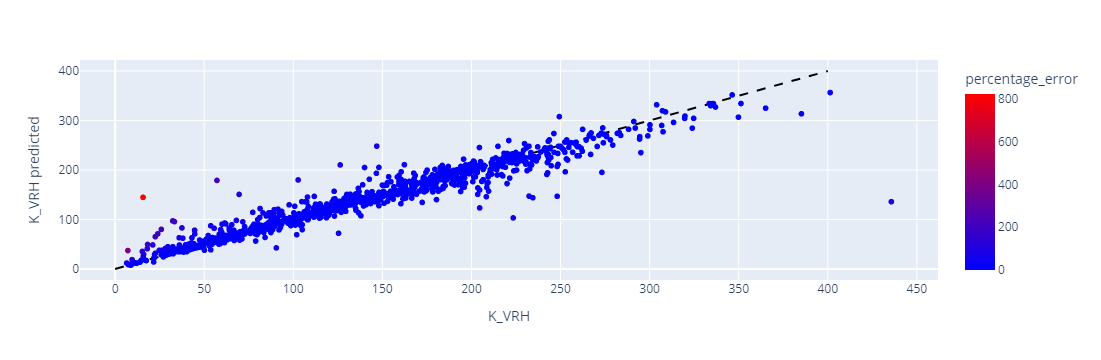

In [74]:
import plotly.express as px
import plotly.graph_objects as go

reference_line = go.Scatter(
    x=[0, 400],
    y=[0, 400],
    line=dict(color="black", dash="dash"),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    df, 
    x="K_VRH", 
    y="K_VRH predicted", 
    hover_name="formula", 
    color="percentage_error", 
    color_continuous_scale=px.colors.sequential.Bluered,
)

fig.add_trace(reference_line)
fig.show()

In [83]:
import numpy as np
newm = rf.predict((X.iloc[2].values + X.iloc[3].values).reshape(1,-1))
print(newm)

[215.44146607]


D:\anaconda\envs\inf\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names



Неплохо! Однако, определенно есть выбросы (вы можете навести курсор мыши на точки, чтобы увидеть, что там такое случилось).

### Интерпретация модели

Важным аспектом машинного обучения является возможность понять, почему модель делает те или иные предсказания. Модели extraTrees особенно легко поддаются интерпретации, поскольку они обладают атрибутом `feature_importances`, который содержит важность каждого признака в определении окончательного прогноза. Давайте посмотрим на важность признаков в нашей модели.

In [81]:
rf.feature_importances_

array([4.02036499e-04, 1.57554598e-03, 6.98091830e-04, 1.32663619e-03,
       1.12334454e-03, 7.23411445e-04, 1.68844701e-02, 5.46835174e-04,
       4.22657770e-03, 3.12475695e-03, 4.45862859e-03, 1.46899273e-02,
       1.17179796e-03, 1.02062411e-03, 4.44304519e-04, 2.41218121e-03,
       7.77969115e-04, 6.56643154e-04, 9.31488257e-02, 4.51283976e-02,
       3.06142071e-03, 2.54735995e-01, 4.38766758e-03, 5.61742625e-02,
       1.90109413e-02, 6.44765978e-04, 3.18263934e-03, 1.57867886e-03,
       2.13388253e-03, 8.91243192e-03, 2.32680909e-04, 1.16353753e-03,
       7.73590924e-04, 1.76257339e-03, 1.23187195e-03, 1.05095883e-03,
       1.56769024e-03, 2.57737600e-03, 1.35674076e-03, 2.80928861e-03,
       1.63531312e-03, 4.06189385e-03, 1.52895528e-02, 1.46884847e-03,
       1.70048876e-03, 1.00757646e-02, 2.19129679e-03, 3.98329579e-03,
       9.31891335e-04, 1.29911194e-04, 3.56981509e-04, 1.31786036e-03,
       7.39818925e-04, 2.85802748e-03, 6.51793337e-04, 3.05474752e-04,
      

Чтобы разобраться в этом, нам нужно знать, какой характеристике соответствует каждое число. Мы можем использовать `PlotlyFig` для построения графика важности 5 наиболее важных характеристик.

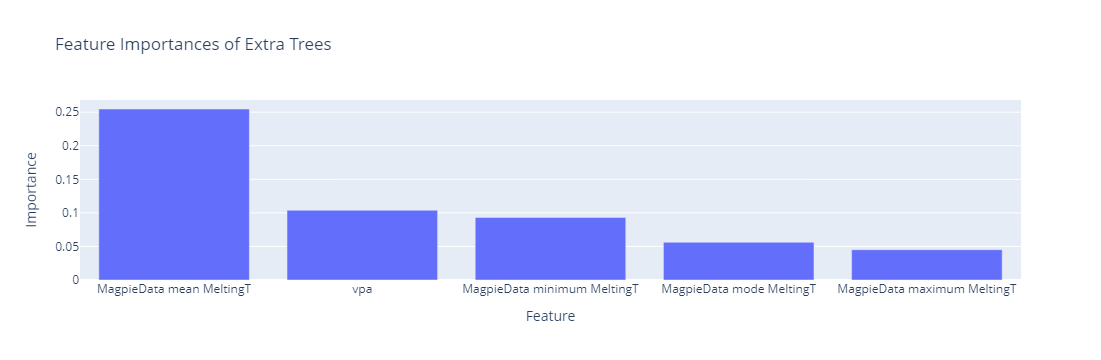

In [84]:
importances = rf.feature_importances_
included = X.columns.values
indices = np.argsort(importances)[::-1]

fig_bar = px.bar(
    x=included[indices][0:5], 
    y=importances[indices][0:5], 
    title="Feature Importances of Extra Trees",
    labels={"x": "Feature", "y": "Importance"}
)
fig_bar.show()


## Advanced features

In [85]:
!pip install ase

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
    --------------------------------------- 0.0/2.9 MB 487.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/2.9 MB 930.9 kB/s eta 0:00:03
   -- ------------------------------------- 0.2/2.9 MB 1.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/2.9 MB 1.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.9 MB 1.7 MB/s eta 0:00:02
   ---------- ----------------------------- 0.7/2.9 MB 2.5 MB/s eta 0:00:01
   --------------- ------------------------ 1.1/2.9 MB 3.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.4/2.9 MB 3.5 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.9 MB 4.3 MB/s eta 0:00:01
   ------------------------------------- -- 2.7/2.9 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 5.7 MB/s eta 0:00:00


In [86]:
!pip install dscribe

   ---------------------------------------- 0.0/544.2 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.2 kB 1.4 MB/s eta 0:00:01
   ------ --------------------------------- 92.2/544.2 kB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 174.1/544.2 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 276.5/544.2 kB 1.5 MB/s eta 0:00:01
   --------------------------- ------------ 368.6/544.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 544.2/544.2 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/237.3 kB ? eta -:--:--
   --------------------------------------- 237.3/237.3 kB 15.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.7 MB 14.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 11.2 MB/s eta 0:00:

<img src="clust.png" alt="machine learning workflow" style="width: 700px;"/>

In [131]:
import numpy as np
import ase
import ase.build
from ase import Atoms
from ase.visualize import view
from dscribe.descriptors import SOAP


# Lets create an FCC(111) surface
a=3.597
system = ase.build.fcc111(
    "Cu",
    (2,2,2),
    a=3.597,
    vacuum=10,
    periodic=True
)

# Setting up the SOAP descriptor
soap = SOAP(
    sigma=0.1,
    n_max=12,
    l_max=12,
    weighting={"function": "poly", "r0": 12, "m": 2, "c": 1, "d": 1},
    species=["Cu"],
    periodic=True,
)

# Scan the surface in a 2D grid 1 Å above the top-most atom
n = 100
cell = system.get_cell()
top_z_scaled = (system.get_positions()[:, 2].max() + 1) / cell[2, 2]
range_xy = np.linspace(0, 1, n)
x, y, z = np.meshgrid(range_xy, range_xy, [top_z_scaled])
positions_scaled = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T
positions_cart = cell.cartesian_positions(positions_scaled)

# Create the SOAP desciptors for all atoms in the sample.
D = soap.create(system, positions_cart)

# Save to disk for later training
np.save("r.npy", positions_cart)
np.save("D.npy", D)

In [132]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans, SpectralClustering, DBSCAN
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Load the dataset
D = np.load("D.npy")
r = np.load("r.npy")
n_samples, n_features = D.shape

# Split into different cluster with K-means
n_clusters = 5
model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
model.fit(D)
labels = model.labels_

C:\Users\ПОЛЬЗОВАТЕЛЬ\AppData\Local\Temp\ipykernel_22568\1009145402.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



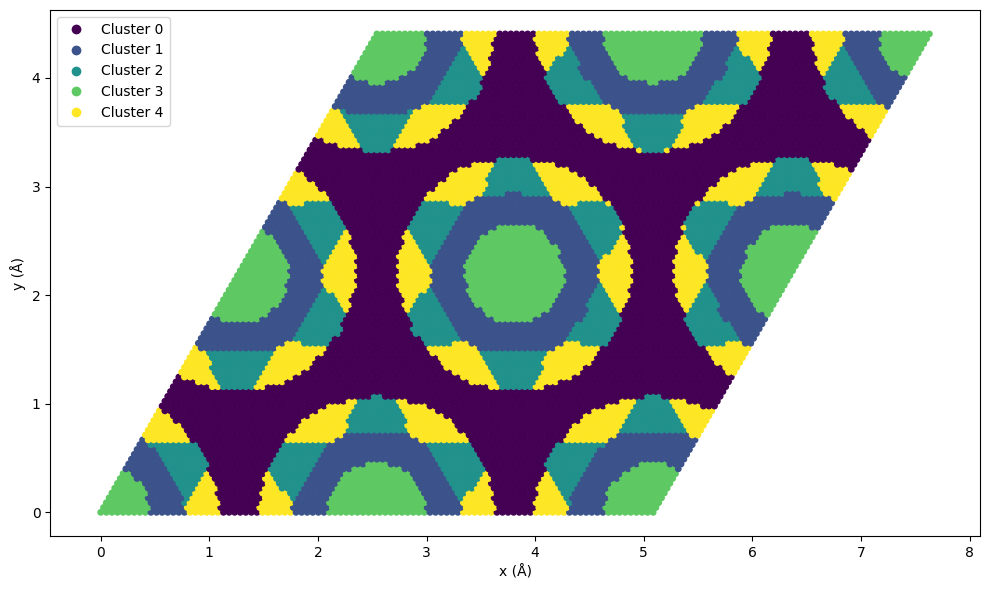

In [133]:
# Visualize clusters in a plot
x = r[:, 0]
y = r[:, 1]
colours = cm.get_cmap('viridis', n_clusters)
classes = ["Cluster {}".format(i) for i in range(n_clusters)]
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.set_xlabel("x (Å)")
ax.set_ylabel("y (Å)")
ax.axis('equal')
scatter = ax.scatter(x, y, c=labels, cmap=colours, s=15)
ax.legend(handles=scatter.legend_elements()[0], labels=classes)
fig.tight_layout()
plt.show()

***А теперь найдите оптимальное кол-во кластеров! Переберите несколько и посмотрите среднее расстояние точек до центров кластеров -- перегиб и есть ответ (scree plot test)

C:\Users\ПОЛЬЗОВАТЕЛЬ\AppData\Local\Temp\ipykernel_22568\546599102.py:26: DeprecationWarning:

Please use atoms.calc = calc



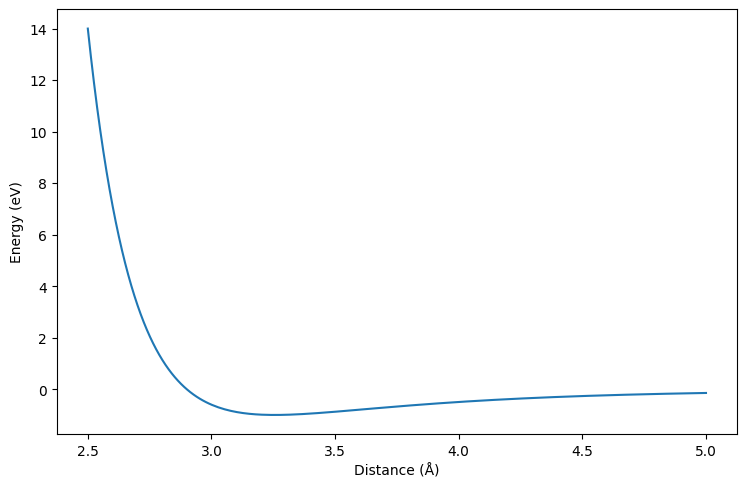

In [135]:
import numpy as np
import ase
from ase.calculators.lj import LennardJones
import matplotlib.pyplot as plt
from dscribe.descriptors import SOAP

# Setting up the SOAP descriptor
soap = SOAP(
    species=["H"],
    periodic=False,
    r_cut=5.0,
    sigma=0.5,
    n_max=3,
    l_max=0,
)

# Generate dataset of Lennard-Jones energies and forces
n_samples = 200
traj = []
n_atoms = 2
energies = np.zeros(n_samples)
forces = np.zeros((n_samples, n_atoms, 3))
r = np.linspace(2.5, 5.0, n_samples)
for i, d in enumerate(r):
    a = ase.Atoms('HH', positions = [[-0.5 * d, 0, 0], [0.5 * d, 0, 0]])
    a.set_calculator(LennardJones(epsilon=1.0 , sigma=2.9))
    traj.append(a)
    energies[i] = a.get_total_energy()
    forces[i, :, :] = a.get_forces()
	
# Plot the energies to validate them
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)
line, = ax.plot(r, energies)
plt.xlabel("Distance (Å)")
plt.ylabel("Energy (eV)")
plt.show()

# Create the SOAP desciptors and their derivatives for all samples. One center
# is chosen to be directly between the atoms.
derivatives, descriptors = soap.derivatives(
    traj,
    centers=[[[0, 0, 0]]] * len(r),
    method="analytical"
)

# Save to disk for later training
np.save("r.npy", r)
np.save("E.npy", energies)
np.save("D.npy", descriptors)
np.save("dD_dr.npy", derivatives)
np.save("F.npy", forces)

In [136]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
torch.manual_seed(7)

# Load the dataset
D_numpy = np.load("D.npy")[:, 0, :]  # We only have one SOAP center
n_samples, n_features = D_numpy.shape
E_numpy = np.array([np.load("E.npy")]).T
F_numpy = np.load("F.npy")
dD_dr_numpy = np.load("dD_dr.npy")[:, 0, :, :, :]  # We only have one SOAP center
r_numpy = np.load("r.npy")

# Select equally spaced points for training
n_train = 30
idx = np.linspace(0, len(r_numpy) - 1, n_train).astype(int)
D_train_full = D_numpy[idx]
E_train_full = E_numpy[idx]
F_train_full = F_numpy[idx]
r_train_full = r_numpy[idx]
dD_dr_train_full = dD_dr_numpy[idx]

# Standardize input for improved learning. Fit is done only on training data,
# scaling is applied to both descriptors and their derivatives on training and
# test sets.
scaler = StandardScaler().fit(D_train_full)
D_train_full = scaler.transform(D_train_full)
D_whole = scaler.transform(D_numpy)
dD_dr_whole = dD_dr_numpy / scaler.scale_[None, None, None, :]
dD_dr_train_full = dD_dr_train_full / scaler.scale_[None, None, None, :]

# Calculate the variance of energy and force values for the training set. These
# are used to balance their contribution to the MSE loss
var_energy_train = E_train_full.var()
var_force_train = F_train_full.var()

# Subselect 20% of validation points for early stopping.
D_train, D_valid, E_train, E_valid, F_train, F_valid, dD_dr_train, dD_dr_valid = train_test_split(
    D_train_full,
    E_train_full,
    F_train_full,
    dD_dr_train_full,
    test_size=0.2,
    random_state=7,
)

# Create tensors for pytorch
D_whole = torch.Tensor(D_whole)
D_train = torch.Tensor(D_train)
D_valid = torch.Tensor(D_valid)
E_train = torch.Tensor(E_train)
E_valid = torch.Tensor(E_valid)
F_train = torch.Tensor(F_train)
F_valid = torch.Tensor(F_valid)
dD_dr_train = torch.Tensor(dD_dr_train)
dD_dr_valid = torch.Tensor(dD_dr_valid)

ModuleNotFoundError: No module named 'torch'

In [ ]:
class FFNet(torch.nn.Module):
    """A simple feed-forward network with one hidden layer, randomly
    initialized weights, sigmoid activation and a linear output layer.
    """
    def __init__(self, n_features, n_hidden, n_out):
        super(FFNet, self).__init__()
        self.linear1 = torch.nn.Linear(n_features, n_hidden)
        torch.nn.init.normal_(self.linear1.weight, mean=0, std=1.0)
        self.sigmoid = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(n_hidden, n_out)
        torch.nn.init.normal_(self.linear2.weight, mean=0, std=1.0)

    def forward(self, x):
        x = self.
        x = self.
        x = self.

        return x


def energy_force_loss(E_pred, E_train, F_pred, F_train):
    """Custom loss function that targets both energies and forces.
    """
    energy_loss = torch.mean((E_pred - E_train)**2) / var_energy_train
    force_loss = torch.mean((F_pred - F_train)**2) / var_force_train
    return energy_loss + force_loss


# Initialize model
model = FFNet(n_features, n_hidden=5, n_out=1)

# The Adam optimizer is used for training the model parameters
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [ ]:
# Train!
n_max_epochs = 5000
batch_size = 2
patience = 20
i_worse = 0
old_valid_loss = float("Inf")
best_valid_loss = float("Inf")

# We explicitly require that the gradients should be calculated for the input
# variables. PyTorch will not do this by default as it is typically not needed.
D_valid.requires_grad = True

# Epochs
for i_epoch in range(n_max_epochs):

    # Batches
    permutation = torch.randperm(D_train.size()[0])
    for i in range(0, D_train.size()[0], batch_size):

        indices = permutation[i:i + batch_size]
        D_train_batch, E_train_batch = D_train[indices], E_train[indices]
        D_train_batch.requires_grad = True
        F_train_batch, dD_dr_train_batch = F_train[indices], dD_dr_train[indices]

        # Forward pass: Predict energies from the descriptor input
        E_train_pred_batch = model(D_train_batch)

        # Get derivatives of model output with respect to input variables. The
        # torch.autograd.grad-function can be used for this, as it returns the
        # gradients of the input with respect to outputs. It is very important
        # to set the create_graph=True in this case. Without it the derivatives
        # of the NN parameters with respect to the loss from the force error
        # will not be populated (=the force error will not affect the
        # training), but the model will still run fine without errors.
        df_dD_train_batch = torch.autograd.grad(
            outputs=E_train_pred_batch,
            inputs=D_train_batch,
            grad_outputs=torch.ones_like(E_train_pred_batch),
            create_graph=True,
        )[0]

        # Get derivatives of input variables (=descriptor) with respect to atom
        # positions = forces
        F_train_pred_batch = -torch.einsum('ijkl,il->ijk', dD_dr_train_batch, df_dD_train_batch)

        # Zero gradients, perform a backward pass, and update the weights.
        # D_train_batch.grad.data.zero_()
        optimizer.zero_grad()
        loss = energy_force_loss(E_train_pred_batch, E_train_batch, F_train_pred_batch, F_train_batch)
        loss.backward()
        optimizer.step()

    # Check early stopping criterion and save best model
    E_valid_pred = model(D_valid)
    df_dD_valid = torch.autograd.grad(
        outputs=E_valid_pred,
        inputs=D_valid,
        grad_outputs=torch.ones_like(E_valid_pred),
    )[0]
    F_valid_pred = -torch.einsum('ijkl,il->ijk', dD_dr_valid, df_dD_valid)
    valid_loss = energy_force_loss(E_valid_pred, E_valid, F_valid_pred, F_valid)
    if valid_loss < best_valid_loss:
        # print("Saving at epoch {}".format(i_epoch))
        torch.save(model.state_dict(), "best_model.pt")
        best_valid_loss = valid_loss
    if valid_loss >= old_valid_loss:
        i_worse += 1
    else:
        i_worse = 0
    if i_worse > patience:
        print("Early stopping at epoch {}".format(i_epoch))
        break
    old_valid_loss = valid_loss

    if i_epoch % 500 == 0:
        print("  Finished epoch: {} with loss: {}".format(i_epoch, loss.item()))

In [ ]:
# Way to tell pytorch that we are entering the evaluation phase
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

# Calculate energies and force for the entire range
E_whole = torch.Tensor(E_numpy)
F_whole = torch.Tensor(F_numpy)
dD_dr_whole = torch.Tensor(dD_dr_whole)
D_whole.requires_grad = True
E_whole_pred = model(D_whole)
df_dD_whole = torch.autograd.grad(
    outputs=E_whole_pred,
    inputs=D_whole,
    grad_outputs=torch.ones_like(E_whole_pred),
)[0]
F_whole_pred = -torch.einsum('ijkl,il->ijk', dD_dr_whole, df_dD_whole)
E_whole_pred = E_whole_pred.detach().numpy()
E_whole = E_whole.detach().numpy()

# Save results for later analysis
np.save("r_train_full.npy", r_train_full)
np.save("E_train_full.npy", E_train_full)
np.save("F_train_full.npy", F_train_full)
np.save("E_whole_pred.npy", E_whole_pred)
np.save("F_whole_pred.npy", F_whole_pred)

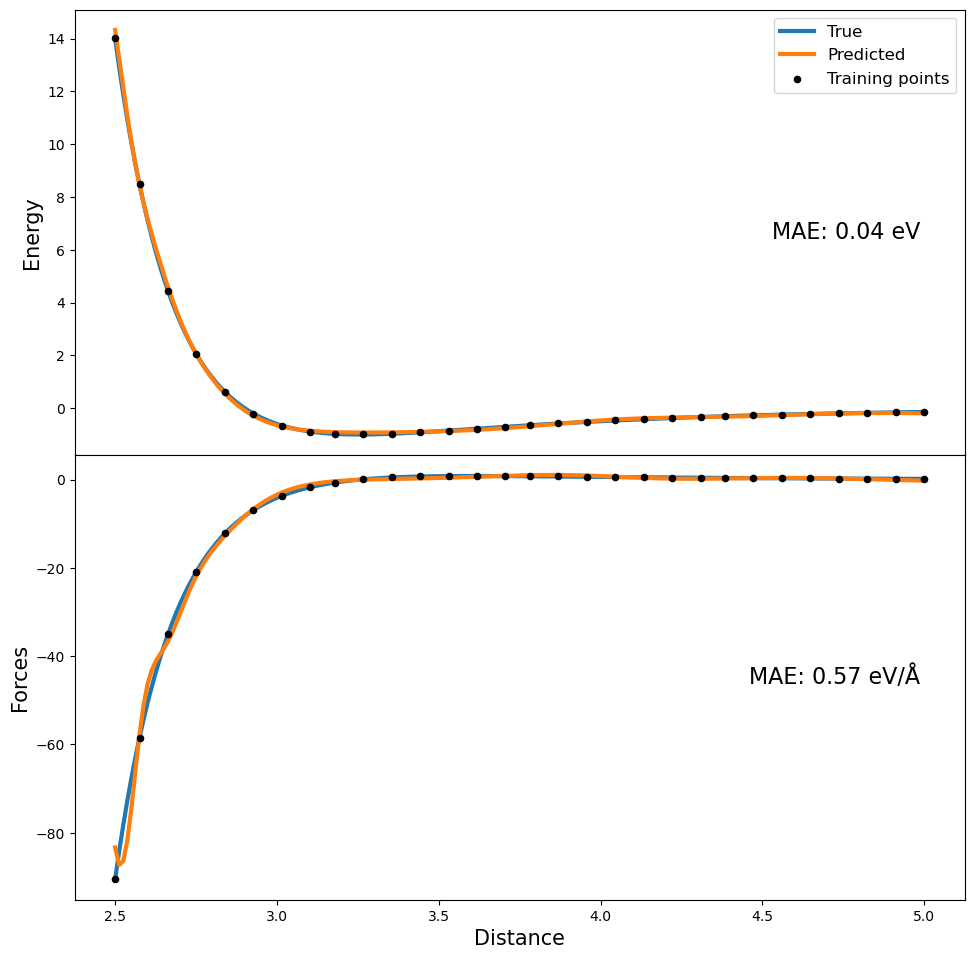

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load data as produded by the trained model
r_whole = np.load("r.npy")
r_train_full = np.load("r_train_full.npy")
order = np.argsort(r_whole)
E_whole = np.load("E.npy")
E_train_full = np.load("E_train_full.npy")
E_whole_pred = np.load("E_whole_pred.npy")
F_whole = np.load("F.npy")
F_train_full = np.load("F_train_full.npy")
F_whole_pred = np.load("F_whole_pred.npy")
F_x_whole_pred = F_whole_pred[order, 0, 0]
F_x_whole = F_whole[:, 0, 0][order]
F_x_train_full = F_train_full[:, 0, 0]

# Plot energies for the whole range
order = np.argsort(r_whole)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
ax1.plot(r_whole[order], E_whole[order], label="True", linewidth=3, linestyle="-")
ax1.plot(r_whole[order], E_whole_pred[order], label="Predicted", linewidth=3, linestyle="-")
ax1.set_ylabel('Energy', size=15)
mae_energy = mean_absolute_error(E_whole_pred, E_whole)
ax1.text(0.95, 0.5, "MAE: {:.2} eV".format(mae_energy), size=16, horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)

# Plot forces for whole range
ax2.plot(r_whole[order], F_x_whole, label="True", linewidth=3, linestyle="-")
ax2.plot(r_whole[order], F_x_whole_pred, label="Predicted", linewidth=3, linestyle="-")
ax2.set_xlabel('Distance', size=15)
ax2.set_ylabel('Forces', size=15)
mae_force = mean_absolute_error(F_x_whole_pred, F_x_whole)
ax2.text(0.95, 0.5, "MAE: {:.2} eV/Å".format(mae_force), size=16, horizontalalignment='right', verticalalignment='center', transform=ax2.transAxes)

# Plot training points
ax1.scatter(r_train_full, E_train_full, marker="o", color="k", s=20, label="Training points", zorder=3)
ax2.scatter(r_train_full, F_x_train_full, marker="o", color="k", s=20, label="Training points", zorder=3)

# Show plot
ax1.legend(fontsize=12)
plt.subplots_adjust(left=0.08, right=0.97, top=0.97, bottom=0.08, hspace=0)
plt.show()

### Ещё один пример кластеризации по отдельным локальным окружениям двух металлическких слоёв

In [145]:
import numpy as np
import ase.io
from ase.build import bulk
from dscribe.descriptors import LMBTR

# Lets create iron in BCC phase
n_z = 8
n_xy_bcc = 10
a_bcc = 2.866
bcc = bulk("Fe", "bcc", a=a_bcc, cubic=True) * [n_xy_bcc, n_xy_bcc, n_z]

# Lets create iron in FCC phase
a_fcc = 3.5825
n_xy_fcc = 8
fcc = bulk("Fe", "bcc", a=a_fcc, cubic=True) * [n_xy_fcc, n_xy_fcc, n_z]

In [146]:
# Setting up the descriptor
descriptor = LMBTR(
    grid={"min": 0, "max": 12, "sigma": 0.1, "n": 200},
    geometry={"function": "distance"},
    weighting={"function": "exp", "scale": 0.5, "threshold": 1e-3},
    species=["Fe"],
    periodic=True,
)

# Calculate feature references
bcc_features = descriptor.create(bcc, [0])
fcc_features = descriptor.create(fcc, [0])

In [147]:
# Combine into one large grain boundary system with some added noise
bcc.translate([0, 0, n_z * a_fcc])
combined = bcc + fcc
combined.set_cell([
    n_xy_bcc * a_bcc,
    n_xy_bcc * a_bcc,
    n_z * (a_bcc + a_fcc)
])
combined.rattle(0.1, seed=7)

In [148]:
# Create a measure of of how similar the atoms are to the reference. Euclidean
# distance is used and the values are scaled between 0 and 1 from least similar
# to identical with reference.
def metric(values, reference):
    dist = np.linalg.norm(values - reference, axis=1)
    dist_max = np.max(dist)
    return  1 - (dist / dist_max)

In [149]:
# Create the features and metrics for all atoms in the sample.
combined_features = descriptor.create(combined)
fcc_metric = metric(combined_features, fcc_features)
bcc_metric = metric(combined_features, bcc_features)

In [150]:
# Write an image with the atoms coloured corresponding to their similarity with
# BCC and FCC: BCC = blue, FCC = red
n_atoms = len(combined)
colors = np.zeros((n_atoms, 3))
for i in range(n_atoms):
    colors[i] = [fcc_metric[i], 0, bcc_metric[i]]
ase.io.write(
    f'coloured.png',
    combined,
    rotation='90x,20y,20x',
    colors=colors,
    show_unit_cell=1,
    maxwidth=2000,
)

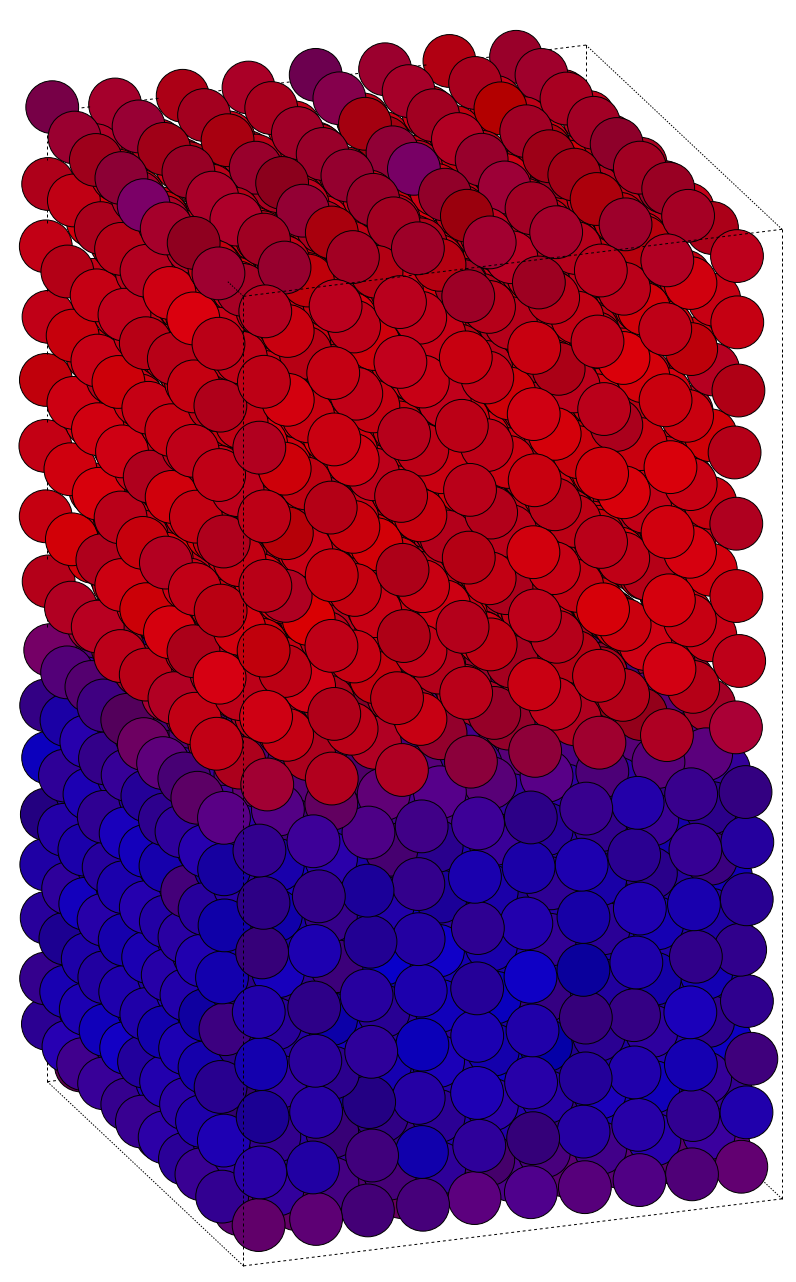

In [151]:
from IPython.display import Image
Image(filename='coloured.png')

# MOFs and other microporous materials 

<img src="gnnZeo.png" alt="machine learning workflow" style="width: 700px;"/>

In [152]:
import ase.io.vasp
from pymatgen.transformations.standard_transformations import PrimitiveCellTransformation
import subprocess
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib.pyplot import plot
from pymatgen.io.cif import CifParser
from ase.io import vasp
import os
import shutil
import glob
import re
import ase as ass
import pymatgen.core as pm
from pymatgen.io.vasp.inputs import Poscar
# import ase.build as ab
from pymatgen.util.coord import pbc_diff, get_angle
import numpy as np
from pymatgen.analysis.local_env import NearNeighbors, CrystalNN, vol_tetra
import warnings
warnings.filterwarnings("ignore")

In [153]:
def getSiteDistances(structure, siteIndex):  # nearest neighbours distances
    distances = []

    cnn = CrystalNN(search_cutoff = 2.0)
    nn1 = cnn.get_nn_data(structure, siteIndex)  # nearest neighbours
    for i, a in enumerate(nn1[0]):
        distances.append(structure.sites[siteIndex].distance(
            structure.sites[nn1[0][i]['site_index']]))  # get distance from Tsite to neighbour
    return distances


def storeSpectra(convsFilesNames, datFilePath):
    # write a header to the .dat file
    try:
        # convName = convsFilesNames[0]
        filePath = convsFilesNames[0]
        convSpec = np.loadtxt(filePath)

        header = "Name " + \
            " ".join(list(map(lambda x: str(round(x, 2)), theta)))
        dataWrite = open(datFilePath, "w")
        dataWrite.writelines(header + "\n")
        dataWrite.close()
    except:
        print("looks like there are no convolution files :( ")

    # write patterns to dat. file
    for i in range(len(convsFilesNames)):
        convName = convsFilesNames[i]
        lineName = convName.split(os.sep)[-1].split(".")[0]
        # startDir + os.sep + folderForConvName + os.sep + convName
        filePath = convsFilesNames[i]
        convSpec = np.loadtxt(filePath)

        # print(lineName)

        # write to .dat file one spectrum
        dataWrite = open(datFilePath, "a")
        dataWrite.writelines(
            lineName + " " + " ".join(map(lambda x: str(x), convSpec[:, 1])) + "\n")
        dataWrite.close()


def flatten(l):
    return [item for sublist in l for item in sublist]


def getPathsToFiles(pathWithFiles):
    paths = os.listdir(pathWithFiles)
    paths = list(map(lambda x: pathWithFiles+os.sep+x, paths))
    return paths


def RoundAll(listR, digit):
    def ceilLambda(x): return round(x, digit)
    if(isinstance(listR, tuple)):
        return tuple(map(ceilLambda, listR))
    if(isinstance(listR, list)):
        return list(map(ceilLambda, listR))
    else:
        raise ValueError(
            'RoundAll function get in input sth that is not a list or tuple')


def getTO4volume(currentStruct, SiSite, site_N):
    cnn = CrystalNN(search_cutoff = 2.0)
    siSiteIndex = SiSite[site_N][0]
    nn1 = cnn.get_nn_data(currentStruct, siSiteIndex)  # nearest neighbours
    v1 = np.asarray((nn1[0][0]['site'].x, nn1[0][0]['site'].y, nn1[0][0]['site'].z))
    v2 = np.asarray((nn1[0][1]['site'].x, nn1[0][1]['site'].y, nn1[0][1]['site'].z))
    v3 = np.asarray((nn1[0][2]['site'].x, nn1[0][2]['site'].y, nn1[0][2]['site'].z))
    v4 = np.asarray((nn1[0][3]['site'].x, nn1[0][3]['site'].y, nn1[0][3]['site'].z))
    return vol_tetra(v1, v2, v3, v4)


def get_angle_between_closest_sites(structure, siteIndex):
    angles = []
    cnn = CrystalNN(search_cutoff = 2.0)
    nn1 = cnn.get_nn_data(structure, siteIndex)  # nearest neighbours
    for i in range(len(nn1[0])):
        #dist0 = []
        nn_O = cnn.get_nn_data(structure, nn1[0][i]['site_index'])
        #dist0.append(np.asarray((nn_O[0][0]['site'].x, nn_O[0][0]['site'].y, nn_O[0][0]['site'].z)))
        #dist0.append(np.asarray((nn1[0][i]['site'].x, nn1[0][i]['site'].y, nn1[0][i]['site'].z)))
        #dist0.append(np.asarray((nn_O[0][1]['site'].x, nn_O[0][1]['site'].y, nn_O[0][1]['site'].z)))
        try:
            v1 = pbc_diff(structure[nn_O[0][0]['site_index']].frac_coords, structure[nn1[0][i]['site_index']].frac_coords)
            v2 = pbc_diff(structure[nn_O[0][1]['site_index']].frac_coords, structure[nn1[0][i]['site_index']].frac_coords)
            cart_v1 = structure.lattice.get_cartesian_coords(v1)
            cart_v2 = structure.lattice.get_cartesian_coords(v2)
            angles.append(get_angle(cart_v1, cart_v2, units="degrees"))
        except:pass
    return angles

In [154]:
pathWithFiles = 'data/micr'
paths = os.listdir(pathWithFiles)
paths = list(map(lambda x: pathWithFiles+os.sep+x, paths))

In [155]:
stParams = []
for zeo in paths:
    parser = CifParser(f"{zeo}")
    currentStruct = parser.get_structures()[0]
    
    siSites = [(siteIndex, site) for siteIndex, site in enumerate(
        currentStruct.sites) if site.species_string == 'Si']
    #print(siSites)
    # lattice parameters
    a, b, c = RoundAll(currentStruct.lattice.abc, 4)
    alpha, beta, gamma = RoundAll(currentStruct.lattice.angles, 4)
    volume = round(currentStruct.lattice.volume, 4)
    # f.write(str(round(a,8))+'\t'+str(round(b,8))+'\t'+str(round(c,8)) + '\t'+str(round(alpha,4))+'\t'+str(round(beta,4))+'\t'+str(round(gamma,4))+'\t'+ str(round(volume,8))+'\t')
    
    # number of tSites in Zeo
    siSitesNum = len(siSites)

    stParams.append([a,b,c,alpha,beta,gamma,volume,siSitesNum])
    
    # # 4 distances for 1st tSite
    # #d = RoundAll(getSiteDistances(currentStruct, siSites[0][0]), 5)

    # # check number of tSite neighbours
    # #if(len(d) != 4):
    # goon = True
    # site = 0
    # while goon:
    #     #raise RuntimeError("d is less then 4 numbers ")
    #     d = RoundAll(getSiteDistances(currentStruct, siSites[site][0]), 5)
    #     print(d)
    #     if(len(d) == 4):
    #         goon = False
    #     else:
    #         site+=1
    # d = sorted(d)
    # # averaged distances around 3 tetraedra
    # dAver = round(sum(d)/len(d), 5)
    # print('d = ', d, 'daver = ', dAver)

    # # averaged T-O distance for all tSites
    # SiOdistanceList = []
    # for i in range(len(siSites)):
    #     SiOdistanceList.append(
    #         RoundAll(getSiteDistances(currentStruct, siSites[i][0]), 5))
    # averSiOdistance = round(sum(flatten(SiOdistanceList)) /
    #                         len(flatten(SiOdistanceList)), 5)
    # print('averSiOdistance = ', averSiOdistance)
    
    # # volume of SiO4 tetrahedra
    # tetraVolume = round(getTO4volume(currentStruct, siSites,site), 5)
    # print('Ti-site volume = ', tetraVolume)
    # f.write(str(tetraVolume)+'\t')
    # f.write(str(len(siSites))+'\t')
    # f.write(str(round(float(len(siSites))/volume*1000, 4))+'\t')
    # f.write(str(round(d[0],5))+'\t')
    # f.write(str(round(d[1],5))+'\t')
    # f.write(str(round(d[2],5))+'\t')
    # f.write(str(round(d[3],5))+'\t')
    # f.write(str(round(averSiOdistance,5))+'\t')
    
    # # T-O-T angle
    # angles_av = 0
    # angles = get_angle_between_closest_sites(currentStruct, siSites[site][0])
    # angles = sorted(angles)
    # print('Angles = ', angles)
    # angl_amount = 0
    # for j in range(len(siSites)):
    #     an = get_angle_between_closest_sites(currentStruct, siSites[j][0])
    #     angl_amount += len(an)
    #     angles_av+=np.sum(np.array(an))
    # angles_av/=float(angl_amount)
    # print('Averaged angle = ', angles_av)
    # f.write(str(round(angles[0], 2))+'\t')
    # f.write(str(round(angles[1], 2))+'\t')
    # f.write(str(round(angles[2], 2))+'\t')
    # f.write(str(round(angles[3], 2))+'\t')
    # f.write(str(round(angles_av, 2))+'\n')
            
    # f.close()
    # id_zeo+=1
    # print('                                          ')

stParams = np.array(stParams)

In [156]:
paramsDat = pd.DataFrame(stParams,columns=['a','b','c','alpha','beta','gamma','volume','siSitesNum'])

In [158]:
!pip install matgl

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     ------------------- ------------------- 61.4/125.2 kB 3.4 MB/s eta 0:00:01
     -------------------------------------- 125.2/125.2 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/223.2 kB ? eta -:--:--
   -------------------- ------------------- 112.6/223.2 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 223.2/223.2 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB 16.4 MB/s eta 0:00:01
   ----- ---------------------------------- 0.7/5.3 MB 7.5 MB/s eta 0:00:01
   --------- ------------------------------ 1.2/5.3 MB 9.7 MB/s eta 0:00:01
   --------------- ------------------------ 2.1/5.3 MB 11.1 MB/s eta 0:00:01
   ------------------------ --------------- 3.3/5.3 MB 15.0 MB/s eta 0:00:01
   ---------------------------------- ----- 4.6/5.3 MB 17.2 MB/s eta 0:00:01
   ----

In [160]:
import matgl
model = matgl.load_model("MEGNet-MP-2018.6.1-Eform")

ValueError: No valid model found in pre-trained_models at https://github.com/materialsvirtuallab/matgl/raw/main/pretrained_models/.

In [48]:
energ = []
for i, zeo in enumerate(paths):
    parser = CifParser(f"{zeo}")
    currentStruct = parser.get_structures()[0]
    
    energ.append(model.predict_structure(currentStruct))

energ = np.array(energ)

In [49]:
paramsDat['energy'] = energ

In [50]:
paramsDat.corr().style.background_gradient(cmap='viridis').set_precision(2)